# Utkarsh Tripathi

## Classification of Iris Flowers

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
import missingno

In [18]:
dt = pd.read_csv('Iris_data.csv')
dt.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


#### Checking Empaty values in data

In [19]:
dt.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Cheking data Types of Data

In [ ]:
dt.info()

#### label Encoding

In [21]:
dt = dt.rename(columns={'SepalLengthCm':'sepal_length', 
                        'SepalWidthCm':'sepal_width', 
                        'PetalLengthCm':'petal_length', 
                        'PetalWidthCm':'petal_width'})

#### Converting float data type into integer

In [22]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for x in columns:
    dt[x] = dt[x].astype(int)

In [23]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            150 non-null    int64 
 1   sepal_length  150 non-null    int32 
 2   sepal_width   150 non-null    int32 
 3   petal_length  150 non-null    int32 
 4   petal_width   150 non-null    int32 
 5   Species       150 non-null    object
dtypes: int32(4), int64(1), object(1)
memory usage: 4.8+ KB


#### Data Analysis

C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


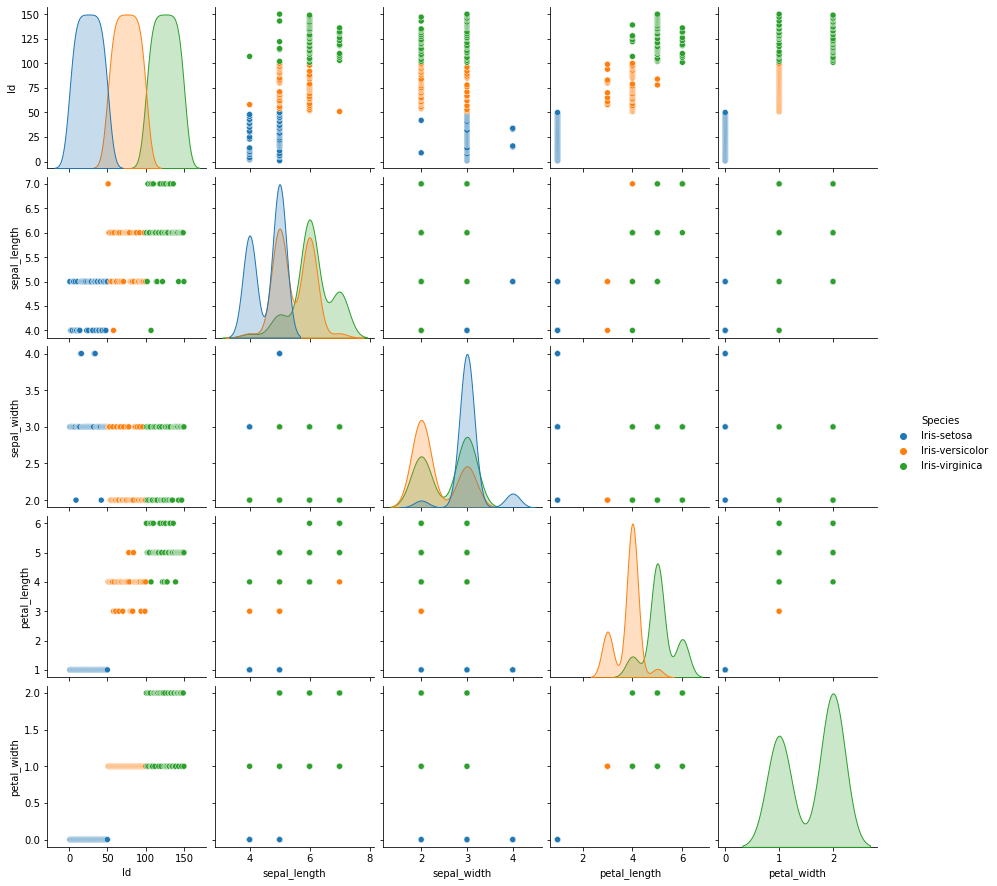

In [31]:
sb.pairplot(data = dt, hue = 'Species')

### Using Pandas Profiling

In [33]:
!pip install pandas-profiling==2.7.1 

from pandas_profiling import ProfileReport
pr = ProfileReport(dt)
pr.to_file(output_file = 'Output.html')

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Anaconda\lib\site-packages\pandas_profiling\visualisation\plot.py:166: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
dt.head(1)

,Id,sepal_length,sepal_width,petal_length,petal_width,Species
0,1,5,3,1,0,Iris-setosa


### Assining Data to X & Y  

In [40]:
x = dt.iloc[: , :-1]
y = dt['Species']

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

### Logistic Regression

In [80]:
model = LogisticRegression()

In [81]:
model.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
model.score(x_train, y_train)

1.0

In [83]:
model.score(x_test, y_test)

0.9666666666666667

## SVM

In [84]:
from sklearn.svm import SVC
svm_model = SVC()

In [85]:
svm_model.fit(x_train, y_train) 

SVC()

In [86]:
svm_model.score(x_train, y_train)

0.9777777777777777

In [88]:
svm_model.score(x_test, y_test)

0.9833333333333333

In [94]:
svm_model.predict([[2, 4.9, 3.0, 1.4,  0.2]])

array(['Iris-setosa'], dtype=object)

## Converting model into File Using pickle

In [95]:
import pickle

In [97]:
pickle.dump(svm_model, open('Pickel_file_Iris_data', 'wb'))

In [99]:
pkl_model = pickle.load(open('Pickel_file_Iris_data', 'rb'))

In [101]:
pkl_model.predict([[7,4.7, 3.2, 1.3, 0.2]])

array(['Iris-setosa'], dtype=object)

### Thank u  so much